## Outline

1. Data Preparation
2. Data Exploration

In [ ]:
!pip3 install deeplake kaggle

Kaggle API keys


In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrewnoboa","key":"c4887291e19461c3cc16dca7a8786d12"}\r\n'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!chmod 600 ~/.kaggle/kaggle.json

Download speech audio from Kaggle

In [7]:
# descargar dataset kaggle
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio 
# unzip en folder ./data/
!unzip -qq ./ravdess-emotional-speech-audio -d  ./data/

ravdess-emotional-speech-audio.zip: Skipping, found more recently modified local copy (use --force to force download)


1. Data Preparation

In [8]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [9]:
# data path
Ravdess = "./data/audio_speech_actors_01-24/"

In [10]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,calm,./data/audio_speech_actors_01-24/Actor_16/03-0...
1,neutral,./data/audio_speech_actors_01-24/Actor_16/03-0...
2,disgust,./data/audio_speech_actors_01-24/Actor_16/03-0...
3,surprise,./data/audio_speech_actors_01-24/Actor_16/03-0...
4,angry,./data/audio_speech_actors_01-24/Actor_16/03-0...


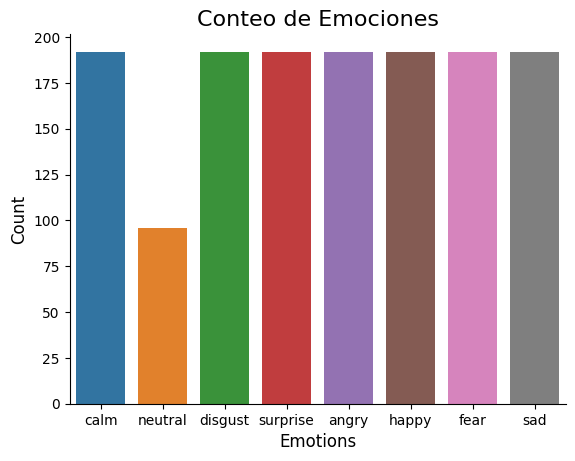

In [11]:
plt.title('Conteo de Emociones', size=16)
sns.countplot(x=Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


In [12]:
data,sr = librosa.load(file_path[0])
sr


22050

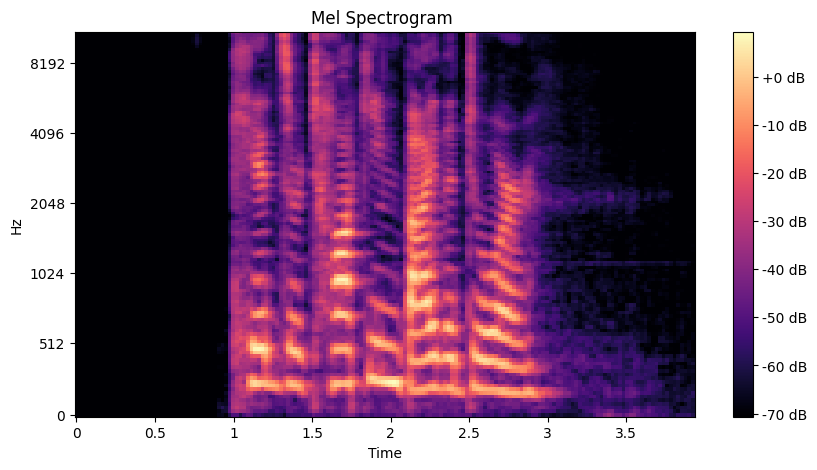

In [13]:

# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')


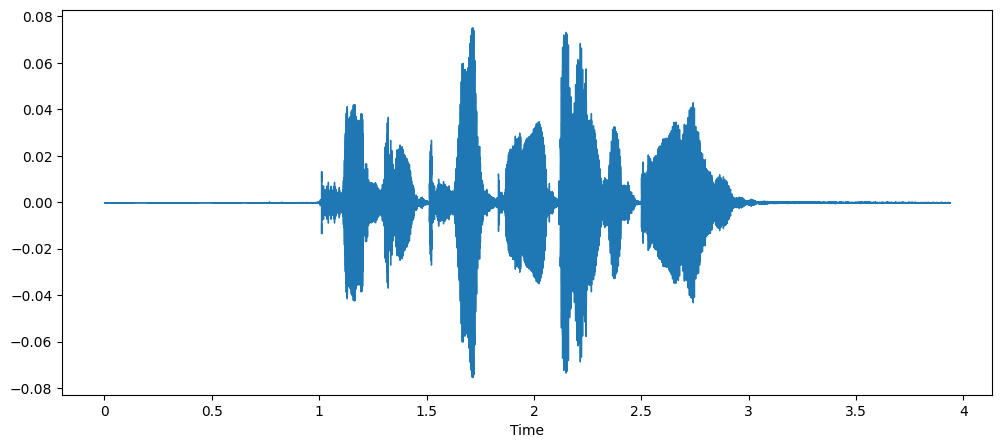

In [16]:

import IPython.display as ipd

# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

# Observaciones

- Tiene un buen balance y los archivos tienen bastante claridad, existe la misma cantidad de mujeres y hombres en el dataset, además de que existe la misma cantidad de archivos por emociones, evitando el class imbalance. 
- Existe mayor cantidad de investigaciones aplicadas a este dataset.
- Buen posible candidato